Če želiš (ni pa ti treba), si napiši funkciji:

- `preblizu(x1, y1, x2, y2)`, ki vrne `True`, če je razdalja med podanima koordinatama manjša od 1.5;
- `koordinate(ime, osebe)`, ki vrne koordinate osebe s podanim imenom.

Vse funkcije, ki jih sprogramiraš, se lahko kličejo med seboj – kjer ti to pomaga.

### Rešitev

Ubogajmo nasvet, napišimo.

In [1]:
def preblizu(x1, y1, x2, y2):
    return (x1 - x2) ** 2 + (y1 - y2) ** 2 < 1.5 ** 2

def koordinate(ime, osebe):
    for ime1, x, y in osebe:
        if ime == ime1:
            return x, y

Mimogrede opazimo, da funkcija `koordinate` vrne `None`, če oseba ne obstaja. Lepo bi bilo, če bi bil ta rezultat kar ekspliciten, torej, če dodamo `return None`.

## 1. Preblizu stoječi

Razpored oseb na določeni prireditvi, je podan s seznamom trojk, ki vsebujejo ime in koordinati (v metrih); glej primer. Napiši funkcijo `krsitelji(osebe)`, ki prejme takšen seznam in vrne množico imen vseh oseb, ki so manj kot 1,5 m oddaljene od najbližje osebe. V primeru na sliki so to vsi razen Dani in Klare.

```text
osebe = [("Ana", 2, 4.5),
         ("Berta", 1, 3),
         ("Cilka", 1, 4),
         ("Dani", -1, 2),
         ("Ema", 1, 1),
         ("Fanči", 2, 0.5),
         ("Greta", -1, -1.5),
         ("Helga", 0, -1),
         ("Iva", 2, 0),
         ("Jana", 0, 0),
         ("Klara", 5, 1)]
```

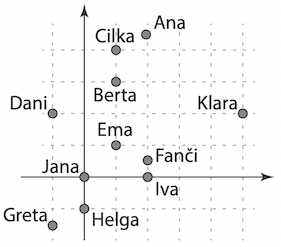

### Rešitev

Najpreprostejša rešitev: pogledamo vse pare. Če potrebujemo pare, bo to vedno pomenilo dvojno zanko, v tem primeru prek seznama oseb.

In [2]:
def krsitelji(osebe):
    imena = set()
    for ime, x1, y1 in osebe:
        for drugi, x2, y2 in osebe:
            if ime != drugi and preblizu(x1, y1, x2, y2):
                imena.add(ime)
                break
    return imena

Rešitev je preprosta, vseeno pa zasluži nekaj komentarjev.

- Ne smemo pozabiti `ime1 != ime2`. Če ga izpustimo, bo seznam na koncu vseboval vse osebe, saj je vsak preblizu sebe.
- Dodali smo samo `ime`. Lahko bi napisali še `imena.add(drugi)`, vendar bo oseba z imenom `drugi` tako ali tako dodana kasneje (ko bosta `ime` in `drugi` v ravno zamenjanih vlogah).
- `break` je nepotreben; rezultat bi bil enak brez njega, le funkcija bi bila malenkost počasnejša. Je pa lušten zato, ker se zaradi njega funkcija lepo bere: zunanja zanka gre prek oseb in notranja preveri, ali obstaja kak drugi, ki stoji tej osebi preblizu. Če ga najde, doda osebo med kršitelje in prekine zanko.

Krajša oblika funkcije skrči notranjo zanko v `any`:

In [3]:
def krsitelji(osebe):
    imena = set()
    for ime, x1, y1 in osebe:
        if any(ime != druga and preblizu(x1, y1, x2, y2) for druga, x2, y2 in osebe):
            imena.add(ime)
    return imena

To nas vodi v še krajšo obliko, kjer preprosto naberemo vse v izpeljano množico.

In [4]:
def krsitelji(osebe):
    return {ime for ime, x1, y1 in osebe
            if any(ime != druga and preblizu(x1, y1, x2, y2) for druga, x2, y2 in osebe)}

## 2. Kazni

Vsaki osebi izrečemo toliko kazni, kolikor osebam stoji preblizu. Emi, recimo, 3, ker stoji preblizu Fanči, Ive in Jane.

Napiši funkcijo `kazni(osebe)`, ki vrne slovar, katerega ključi so imena kaznovanih oseb, vrednosti pa število izrečenih kazni.

### Rešitev

Funkcija je praktično enaka prejšnji, le da ne iščemo, temveč štejemo.

In [5]:
def kazni(osebe):
    izrecene = {}
    for ime, x1, y1 in osebe:
        kazen = 0
        for druga, x2, y2 in osebe:
            if ime != druga and preblizu(x1, y1, x2, y2):
                kazen += 1
        if kazen:
            izrecene[ime] = kazen
    return izrecene

Z malo zvitosti se lahko znebimo pogoje `ime != druga`: pustimo, da bo vsak kaznovan zaradi sebe, a kazni začnemo šteti pri `-1`.

In [6]:
def kazni(osebe):
    izrecene = {}
    for ime, x1, y1 in osebe:
        kazen = -1
        for druga, x2, y2 in osebe:
            if preblizu(x1, y1, x2, y2):
                kazen += 1
        if kazen:
            izrecene[ime] = kazen
    return izrecene

Če se spomnimo, da je `True` isto kot `1` in `False` isto kot `0`, lahko nadomestimo notranjo zanko s seštevanjem.

In [7]:
def kazni(osebe):
    izrecene = {}
    for ime, x1, y1 in osebe:
        kazen = sum(preblizu(x1, y1, x2, y2) for _, x2, y2 in osebe) - 1
        if kazen:
            izrecene[ime] = kazen
    return izrecene

Se da tudi to skrčiti v eno vrstico. Da. Uporabiti je potrebno "walrus operator", ki ga pri Programiranju 1 (vsaj v doslejšnjih letih) nismo omenjali. Šlo bi tudi brez njega, vendar je z njim preprosteje. Tako.

In [8]:
def kazni(osebe):
    return {ime: kazen for ime, x1, y1 in osebe
            if (kazen := sum(preblizu(x1, y1, x2, y2) for _, x2, y2 in osebe) - 1) > 0}

Preveriti moramo, ali je vsota kazni večja od 0 in potem to kazen uporabiti kot vrednost. Da kazni ne bi računali dvakrat, ali pa delali gnezdenih generatorjev, izračunano vsoto shranimo v `kazen`. Walrus, `:=`, je potrebno uporabiti, ker `=` ne bi deloval, saj v Pythonu prirejanje ni izraz. Kdor ne razume, nič hudega.

Če drugo nalogo rešimo prej kot prvo, lahko prvo funkcijo sprogramiramo kar s preprostim klicem druge: kršitelji so vsi, ki so kaznovani.

In [9]:
def krsitelji(osebe):
    return set(kazni(osebe))

## 3. Severni veter

Na prireditvi se je pojavila nova različica virusa, omega, ki te v trenutku okuži in naredi kužnega. Ker pa je pihal severni veter, vsaka oseba okuži le vse osebe, ki stojijo južno od nje na razdalji manjši od 1,5 metra. Če je Ema bolna, zaradi nje zbolijo Fanči, Iva, Jana, Greta in Helga. Če pa je bolna Jana, zaradi nje zbolita samo Greta in Helga, ne pa tudi Ema.

Napiši funkcijo `okuzeni(ime, osebe)`, ki prejme ime okužene in seznam oseb; vrne množico imen oseb, ki se okužijo.

### Rešitev

Tole je naloga iz rekurzije. V bistvu gre za nalogo, v kateri je bilo potrebno dobiti vsa imena članov neke rodbine, le da nimamo seznama otrok, temveč je "otrok" vsak, ki stoji južno in je premalo oddaljen.

In [10]:
def okuzeni(ime, osebe):
    imena = {ime}
    x1, y1 = koordinate(ime, osebe)
    for drugi, x2, y2 in osebe:
        if y1 > y2 and preblizu(x1, y1, x2, y2):
            imena |= okuzeni(drugi, osebe)
    return imena

Smo pozabili `drugo != ime`? Nismo. Vendar ni potreben, saj imamo `y1 > y2`. Če gre za eno in isto osebo, pač ne stoji severno od sebe.

## 4. Kihanje

Če oseba kihne, s prireditve takoj odstranijo njo in vse, ki so manj kot 1,5 m oddaljene od nje. Če torej kihne Jana, takoj odstranijo tudi Helgo in Emo. Napiši funkcijo `kihanje(imena, osebe)`, ki prejme seznam imen oseb, ki so kihale (naštete so v vrstnem redu kihanja!) in seznam oseb na prireditvi. Vrne naj množico imen oseb, ki so po tem še na prizorišču.

Pazi na tole: če najprej kihne Jana in nato Helga, ostane Greta na prizorišču, saj je Helga kihnila, ko je bila že odstranjena!

### Rešitev

Na vsak izpit se potrudim dati nalogo, ki vsebuje kakšno malo zamotano zanko. Tokrat je to ta naloga. Takšne naloge je možno rešiti na kup načinov. Eden je tale.

In [11]:
def kihanje(imena, osebe):
    osebe = osebe.copy()
    for ime in imena:
        koord = koordinate(ime, osebe)
        if koord is None:
            continue
        x1, y1 = koord
        i = 0
        while i < len(osebe):
            _, x2, y2 = osebe[i]
            if preblizu(x1, y1, x2, y2):
                del osebe[i]
            else:
                i += 1
    return {ime for ime, x, y in osebe}

Najprej skopiramo seznam oseb, ker bomo iz njega brisali. Funkcija nima pravice spreminjati vrednosti svojih argumentov!

Potem gremo čez seznam vseh, ki so kihnili. S funkcijo `koordinate` pridobimo njegove koordinate. Če so `None`, je bila oseba že odstranjena in s `continue` preskočimo ostanek telesa zanke. Lahko bi pisali tudi `if koord is not None:` in ves ostanek zanke bi bil znotraj tega `if`. To mi je manj všeč iz dveh razlogov. Prvi je, da imamo potem en nivo zamikov več in to nikoli ni praktično. Drugi je, da se funkcija tako lepše bere: če osebe ni več, potem ni potrebno narediti ničesar.

V notranji zanki bomo brisali osebe iz seznama. Ker z zanko `for` ne moremo prek seznama, iz katerega brišemo elemente, uporabimo `while`. Če oseba stoji preblizu, jo pobrišemo (in naslednji element se premakne na trenutno, `i`-to mesto), sicer stopimo na naslednji element (povečamo `i`). V tej zanki pobrišemo tudi kihajočega, saj "stoji preblizu sebe".

Na koncu vrnemo množico imen, ki so ostala v seznamu osebe. To bi lahko naredili tudi z običajno zanko, ne z izpeljano množico. Vendar je tako hitreje.

Alternativna rešitev je, da ne brišemo iz seznama `osebe`, temveč sestavljamo nov seznam, takole:

In [12]:
def kihanje(imena, osebe):
    for ime in imena:
        koord = koordinate(ime, osebe)
        if koord is None:
            continue
        x1, y1 = koord
        preostali = []
        for ime2, x2, y2 in osebe:
            if not preblizu(x1, y1, x2, y2):
                preostali.append((ime2, x2, y2))
        osebe = preostali
    return {ime for ime, x, y in osebe}

To je krajše. Porabi več pomnilnika, a manj časa. Brisanje iz seznama vzame veliko časa, dodajanje na konec seznama pa je hitro. Zakaj tako, boste bolj razumeli v drugem letniku.

Tretja (izmed mnogih) možnosti je, da vzdržujemo seznam prisotnih oseb. Za vsakega, ki kiha, preverimo, ali je še prisoten. V notranji zanki gremo prek oseb in če je oseba prisotna ter stoji preblizu, jo odstranimo.

In [13]:
def kihanje(imena, osebe):
    prisotne = {ime for ime, x, y in osebe}
    for ime in imena:
        if ime not in prisotne:
            continue
        x1, y1 = koordinate(ime, osebe)
        for ime2, x2, y2 in osebe:
            if ime2 in prisotne and preblizu(x1, y1, x2, y2):
                prisotne.remove(ime2)
    return prisotne

Če namesto `remove` uporabimo `discard`, ni potrebno preverjati, ali je oseba še vedno prisotna. 

```python
            if preblizu(x1, y1, x2, y2):
                prisotne.discard(ime2)
```

Metoda `remove` javi napako, če poskusimo odstraniti element, ki ga ni; `discard` pa v tem primeru ne naredi ničesar.

## 5. Prireditev

Sprogramiraj razred `Prireditev` z naslednjimi metodami.

- konstruktor kot argument prejme minimalno predpisano razdaljo (in, seveda, inicializira objekt)
- `prihod(ime, x, y)` prejme ime in želeni koordinati oseb. Če na predpisani razdalji (tisti, ki jo je prejel konstruktor) od teh koordinat ni nobene druge osebe, sprejme to osebo na te koordinate. V nasprotnem primeru to osebo zavrne. Metoda naj ne vrača ničesar.
- `udelezenci()` vrne množico imen vseh oseb, ki so bile sprejete na prireditev.

### Rešitev

Kakšne podatke mora shranjevati razred? Minimalno zahtevano razdaljo in seznam ime in koordinat oseb na prireditvi. To bi lahko izgledalo tako:

In [14]:
class Prireditev:
    def __init__(self, min_razdalja):
        self.min_razdalja = min_razdalja
        self.osebe = []

    def prihod(self, ime, x, y):
        if all((x - x2) ** 2 + (y - y2) ** 2 >= self.min_razdalja ** 2
               for _, x2, y2 in self.osebe):
            self.osebe.append((ime, x, y))

    def udelezenci(self):
        return {ime for ime, x, y in self.osebe}

Ker nas v resnici ne zanima, kje je kdo, temveč le, katere koordinate so zasedene, lahko koordinate in imena shranjujemo tudi v ločenih atributih. To malenkost poenostavi `prihod` in čisto poenostavi `udelezenci`.

In [15]:
class Prireditev:
    def __init__(self, min_razdalja):
        self.min_razdalja = min_razdalja
        self.koordinate = []
        self.osebe = set()

    def prihod(self, ime, x, y):
        if all((x - x2) ** 2 + (y - y2) ** 2 >= self.min_razdalja ** 2
               for x2, y2 in self.koordinate):
            self.osebe.add(ime)
            self.koordinate.append((x, y))

    def udelezenci(self):
        return self.osebe